# RLE plot

## Import lib

**classic python libraries**

In [22]:
# lib import
import numpy as np
import pandas as pd
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import math

**personnal library**

Find the solution to import your own module, [here](https://www.kaggle.com/discussions/product-feedback/91185)

In [23]:
path_parser='/kaggle/input/medulloblastoma-cavalli-parsed/'
assert os.path.exists(os.path.join(path_parser, 'parser.py')), "parser.py file not found!"

import sys
sys.path.insert(1,path_parser)

from parser import Data

## Check datasets structure and import them

In [24]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medulloblastoma-cavalli-parsed/GSE85217_Cavalli_subgroups_information_parsed.csv
/kaggle/input/medulloblastoma-cavalli-parsed/parser.py
/kaggle/input/medulloblastoma-cavalli-parsed/GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_parsed.txt/GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_parsed.txt


In [25]:
# datas path
path_exp_mat='/kaggle/input/medulloblastoma-cavalli-parsed/GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_parsed.txt/GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_parsed.txt'
path_meta='/kaggle/input/medulloblastoma-cavalli-parsed/GSE85217_Cavalli_subgroups_information_parsed.csv'

In [26]:
data=Data()
data.add_exp_mat(path_exp_mat=path_exp_mat,index_col='genes_name')
data.add_meta(path_meta=path_meta,index_col='samples_name')

In [27]:
data.exp_mat

,MB_SubtypeStudy_55001,MB_SubtypeStudy_55002,MB_SubtypeStudy_55003,MB_SubtypeStudy_55004,MB_SubtypeStudy_55005,MB_SubtypeStudy_55006,MB_SubtypeStudy_55007,MB_SubtypeStudy_55008,MB_SubtypeStudy_55009,MB_SubtypeStudy_55010,...,MB_SubtypeStudy_55754,MB_SubtypeStudy_55755,MB_SubtypeStudy_55756,MB_SubtypeStudy_55757,MB_SubtypeStudy_55758,MB_SubtypeStudy_55759,MB_SubtypeStudy_55760,MB_SubtypeStudy_55761,MB_SubtypeStudy_55762,MB_SubtypeStudy_55763
genes_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,8.810256,8.406470,8.006128,8.156085,7.731048,8.805311,8.902279,7.729933,8.280679,8.030932,...,7.325913,7.965514,7.667200,8.048013,7.583528,8.237443,8.879233,8.027227,8.198219,7.813899
TNMD,4.022827,3.911187,3.686010,3.555897,4.026585,3.935621,4.212156,3.799432,3.906987,3.751994,...,4.012010,3.900344,3.985817,3.617402,3.818528,4.539719,4.023908,4.211934,3.863124,3.740711
DPM1,10.107225,9.861771,10.564233,9.967972,10.090847,10.286749,10.454325,10.752282,10.537412,9.996035,...,9.524450,10.299305,10.364686,10.427957,9.797075,10.238513,10.914443,10.017931,10.507630,10.277027
SCYL3,7.582515,8.461777,8.186035,7.879770,8.216220,8.145683,7.570284,8.240852,7.967473,7.892234,...,7.657312,8.073610,7.709410,7.699548,8.630737,7.963948,7.969378,7.563576,7.645268,7.704992
C1orf112,6.831354,8.085670,8.229447,7.873316,7.916045,7.199585,7.594701,7.830568,7.487867,6.658625,...,7.188234,7.432958,6.604045,7.385075,8.161891,7.505519,7.918162,7.380863,7.078234,7.551968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMEM75,4.234460,4.087673,3.908403,3.874417,4.017526,3.832650,3.817916,3.848514,3.850468,3.875604,...,4.029876,3.843575,3.934983,3.939291,4.075465,3.891615,3.819015,3.856994,3.977876,3.861199
C18orf12,3.616717,4.373555,3.663950,3.806443,3.855606,3.648231,3.837931,3.855303,3.624859,3.447341,...,4.423391,3.917796,3.850005,3.722847,4.441848,3.749983,3.761595,4.210553,4.231942,3.872206
OR12D2,2.229336,2.713571,4.108732,2.820107,2.961778,2.343902,2.302823,2.596473,2.879190,2.301474,...,2.559844,3.709618,2.706699,2.574850,2.502059,2.716143,2.831135,2.785208,3.051605,2.670175


In [28]:
# sort data
data.meta.sort_values(by=['Subtype','Subgroup'],inplace=True)
data.add_supp(key="samples",value=data.meta['Study_ID'].to_list())
data.sel_samples_and_genes_name(samples_name=data.supp["samples"])

In [29]:
# calculate RLE
# calculate the median for each genes
medians_gene=data.exp_mat.median(axis=1)
# substract the median from each genes to get the RLE
rle_mat=data.exp_mat.sub(medians_gene,axis=0)

In [60]:
class RLEplot():
    
    def __init__(self,rle_mat:pd.DataFrame=None):
        
        self.rle_mat=rle_mat
        self.sample_stats=OrderedDict()
    
    @classmethod
    def add_rle_mat(cls,exp_mat:pd.DataFrame) -> "RLEplot":
        
        # calculate the median for each gene accross samples and calculate RLE values
        gene_medians=exp_mat.median(axis=1)
        rle_mat=exp_mat.sub(gene_medians,axis=0)
        
        return cls(rle_mat=rle_mat)
    
    def comp_summary_stats(self,rle_mat:pd.DataFrame=None,outliers:bool=True):
        
        if self.rle_mat is None and rle_mat is None:
            raise ValueError(f"Provide RLE matrix")
        
        if rle_mat is None:
            rle_mat=self.rle_mat
        
        sample_medians=[] # medians for each samples
        sample_q1=[] # first quartile for each samples
        sample_q3=[] # third quartile for each samples
        outlier_points={} # outliers for each samples
        samples=rle_mat.columns
        
        for sample in samples:
            rle_sample=rle_mat[sample]
            median=rle_sample.median()
            q1=rle_sample.quantile(0.25)
            q3=rle_sample.quantile(0.75)
            
            # append sample statistics
            sample_medians.append(median)
            sample_q1.append(q1)
            sample_q3.append(q3)
            
            # print(q1)
            # print(q3)
            
            # identify outliers based on IQR criterion
            if outliers:
                
                iqr=q3-q1
                outlier_values = rle_sample[(rle_sample < q1 - 1.5 * iqr) | (rle_sample > q3 + 1.5 * iqr)]    
                outlier_points[sample]=outlier_values.to_list()
                
        self.sample_stats=self._fill_sample_stats(median=sample_medians,q1=sample_q1,q3=sample_q3,outliers=outlier_points,samples=samples)
    
    @staticmethod
    def _fill_sample_stats(median:list,q1:list,q3:list,outliers:list,samples:list) -> OrderedDict:
        return OrderedDict([('median',median),('q1',q1),('q3',q3),('outliers',outliers),('samples',samples)])
        
    def get_outliers_stats(self,rle_mat:pd.DataFrame=None) -> pd.DataFrame:
        
        if self.rle_mat is None and rle_mat is None:
            raise ValueError(f"Provide RLE matrix")
        
        if rle_mat is None:
            rle_mat=self.rle_mat
            
        if 'outliers' not in set(self.sample_stats.keys()):
            self.comp_summary_stats(rle_mat=rle_mat,outliers=True)
        
        samples=self.sample_stats['samples']
        n_out=[len(self.sample_stats['outliers'][sample])for sample in samples]
        n_genes=rle_mat.shape[0]
        p_out=[n/n_genes for n in n_out]
        
        return pd.DataFrame(data=np.array([n_out,p_out]),index=['# out','% out'],columns=samples)
    
    def get_summary_stats(self,rle_mat:pd.DataFrame=None,outliers:bool=True) -> pd.DataFrame:
        
        if self.rle_mat is None and rle_mat is None:
            raise ValueError(f"Provide RLE matrix")
        
        if rle_mat is None:
            rle_mat=self.rle_mat
            
        self.comp_summary_stats(rle_mat,outliers)
        
        index=['q1','median','q3']
        summary_stats=pd.DataFrame(data=np.array([self.sample_stats[i] for i in index]),index=index,columns=self.sample_stats['samples'])
        
        if outliers:
            return pd.concat([summary_stats,self.get_outliers_stats(rle_mat)])
        else:
            return summary_stats
        
    def density(self,rle_mat:pd.DataFrame=None,ref:bool=True,outliers:bool=False,rout:float=0.1,figsize=(14, 7),save:str=""):
        
        if self.rle_mat is None and rle_mat is None:
            raise ValueError(f"Provide RLE matrix")
        
        if rle_mat is None:
            rle_mat=self.rle_mat
            
        if rout <= 0 or rout > 1:
            raise ValueError(f'rout = {rout}, rout is a ratio and must be between 0 and 1')
        
        self.comp_summary_stats(rle_mat,outliers)
        
        # create plot
        plt.figure(figsize=figsize)
        
        # convert samples name to integer position
        sample_pos=range(len(self.sample_stats['samples']))
                
        # median
        plt.plot(sample_pos,self.sample_stats['median'],color="dimgrey",label="median")
        
        # add line for quartiles Q1 and Q3
        plt.plot(sample_pos, self.sample_stats['q1'], color="dodgerblue", label="Q1")
        plt.plot(sample_pos, self.sample_stats['q3'], color="crimson", label="Q3")
        
        # fill the area between Q1 and Q3
        plt.fill_between(sample_pos, self.sample_stats['q1'], self.sample_stats['q3'], color="lightgrey", alpha=0.5, label="IQR") # add median
        
        # add reference line at zero
        if ref:
            plt.plot(sample_pos, [0 for _ in range(len(sample_pos))], color="snow", linestyle="--", linewidth=1)
        
        if outliers and len(self.sample_stats['outliers'].keys())>0:    
            
            for pos,sample in zip(sample_pos,self.sample_stats['samples']):
                outlier_values=self.sample_stats['outliers'][sample]
                # density is too high for an understanding representation
                n_outliers=len(outlier_values)
                for i in np.linspace(0,n_outliers-1,math.floor(n_outliers*rout)):
                    plt.plot(pos,outlier_values[math.floor(i)],'.', markersize=5, alpha=0.3, color='black')

        plt.xlabel("Samples")
        plt.ylabel("Relative Log Expression")
        plt.legend(loc="upper right")
        plt.show()
        
        if len(save) != 0:
            plt.savefig(save)

In [65]:
rle_plot=RLEplot.add_rle_mat(exp_mat=data.exp_mat)

In [66]:
rle_stats=rle_plot.get_summary_stats()
#rle_stats.to_csv("/kaggle/working/rle_stats.csv",index_label="Summary")

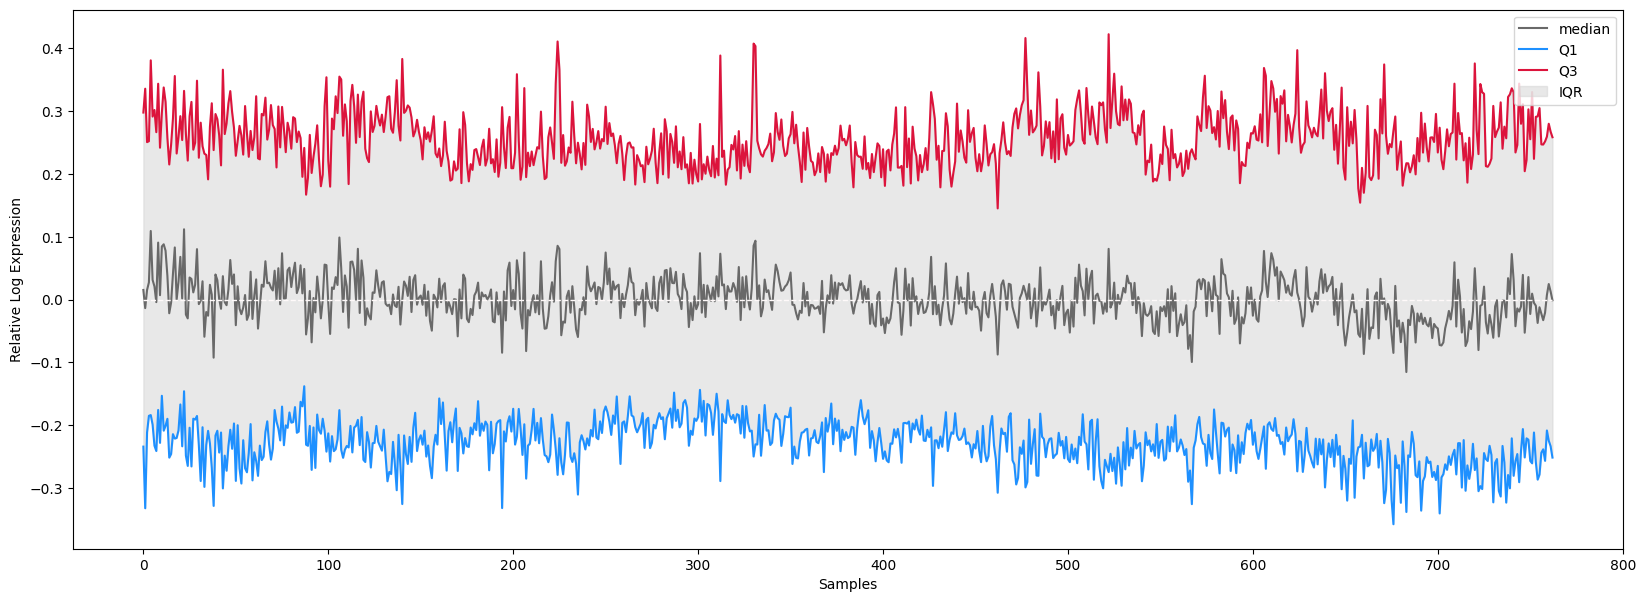

<Figure size 640x480 with 0 Axes>

In [67]:
#rle_test.density(figsize=(20,7),outliers=False,save='/kaggle/working/rle_plot_without_outliers.png')

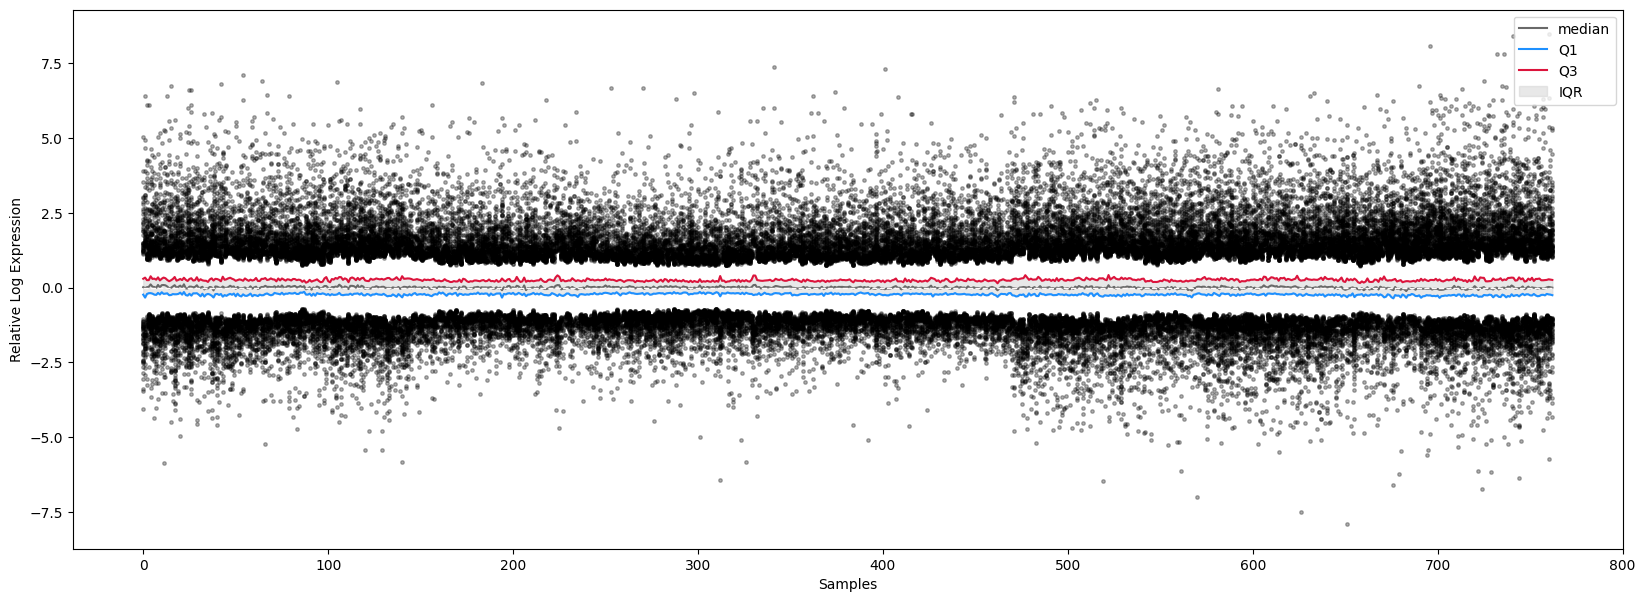

<Figure size 640x480 with 0 Axes>

In [69]:
#rle_test.density(figsize=(20,7),outliers=True,rout=0.05,save='/kaggle/working/rle_plot_with_outliers.png')